<a href="https://colab.research.google.com/github/audrb1999/Paper_review/blob/main/05.Turbo_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TurboTransformers: An Efficient GPU Serving System For Transformer Models

NLP의 성공 뒤에는 Transformer가 있습니다.

Transformer의 핵심은 Attention 메커니즘 입니다. 이를 통해 시퀀스 데이터를 처리할 때 긴 시퀀스에서 먼 거리에 존재하는 relation을 캡처할 수 있습니다.
- 장거리에 존재하는 단어들 간의 관계를 알아낼 수 있다

Transformer 모델은 매우 큰 모델 사이즈와 계산량으로 인해, 특히 Large data set을 다룰 때 많은 리소스가 필요합니다. 이에 따라, GPU를 사용하여 Large Transformer 모델을 serving하는 것이 중요해졌습니다.


이러한 한계를 해결하기 위해 TurboTransformers를 제안합니다. 변압기 모델을 위한 효율적인 GPU 제공 시스템. TurboTransformers는 시스템 아키텍처, 데이터 레이아웃 및 계산 효율성을 최적화하여 높은 처리량과 짧은 대기 시간을 달성합니다.

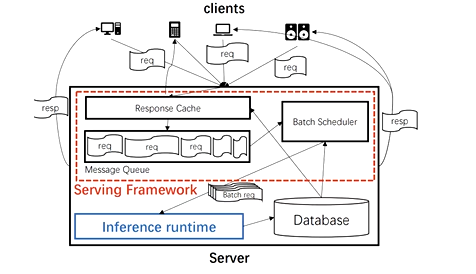

위 사진은 Turbo Transformer가 사용하는 serving system architecture입니다.(server-client architecture)

-  여러 클라이언트가 서버 풀에서 예측을 요청합니다. 서버는 모델을 GPU 메모리에 로드하고 예측을 처리하는 역할을 합니다. 로드 밸런싱을 사용하여 요청을 서버 전체에 고르게 분배합니다.

- 트래픽이 많은 경우 load balancing을 통해 효율적으로 분산 처리를 진행하여 속도가 빨라짐

기존 serving 시스템은 고정 길이 입력만을 다룰 수 있지만 turbo transformer는 Batch Scheduler를 사용하여 variable-length requests에서도 높은 처리량을 달성할 수 있습니다.




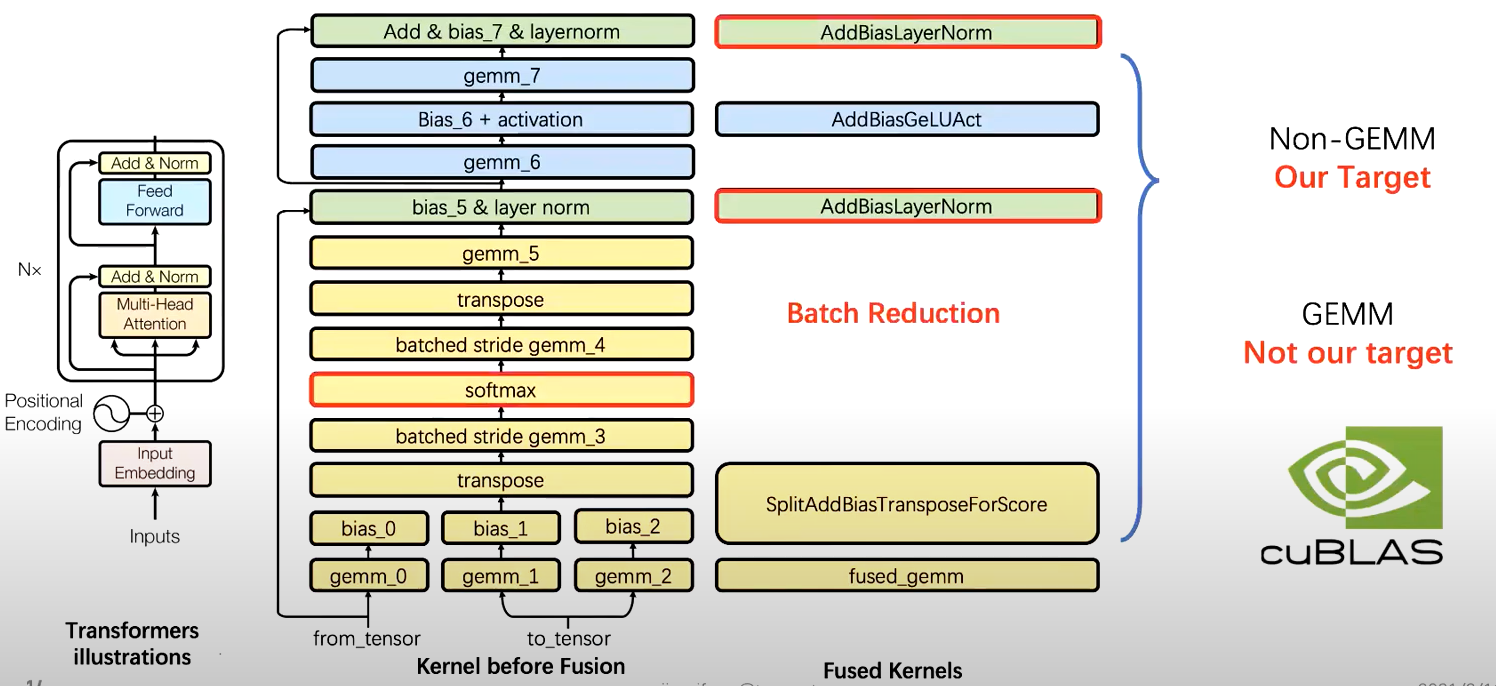

일반적인 경우 GEMM 커널에서 많은 시간이 소요됩니다.(비효율적인 구현을 인해서) Turbo Transformer에서는 Kernel Fusion을 사용하여 계산 효율성을 높입니다.

- 두 GEMM 커널 사이의 모든 커널을 하나의 커널로 합칩니다. 이로 인해 메모리 엑세스 수를 줄이고 캐시 활용도를 향상시켜 계산 시간을 단축합니다.

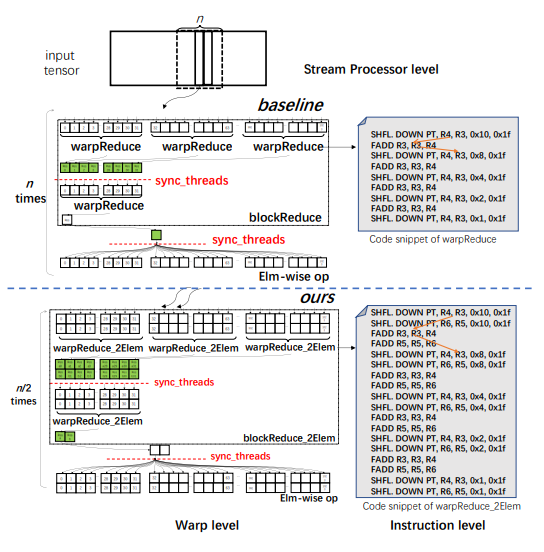

GPU구조에 대해서 공부해보기


Pytorch operator에서 비효율적인 면이 있기 때문에 연산 속도를 높이기 위해서 GPU batch reduction을 최적화 합니다.(CUDA를 사용)

- 여러 CUDA 스레드에서 계산을 병렬화하고 여러 스트림 프로세서에서 작업을 효율적으로 예약함으로써 시스템은 높은 처리량과 짧은 대기 시간을 달성할 수 있습니다. (attention 작업에 대해서 진행)

메모리 관리에서는 Tensor Pooling 기술을 사용하는데 동일한 크기의 Tensor를 재활용하여 메모리 사용량을 줄이는 기술로 모델 serving에서 중요한 역할을 합니다.

- 메모리가 사전에 할당되고 반복사용 되며 추가 할당없이 추론을 진행해야 효율적임



1. cuBLAS와 cuDNN 최적화: cuBLAS와 cuDNN은 GPU에서 행렬과 텐서 관련 연산을 최적화한 라이브러리입니다. TurboTransformers에서는 이 라이브러리들을 최적화하여, GPU에서 최대한 빠르게 연산할 수 있도록 합니다.

2. Asynchronous Execution: TurboTransformers는 CUDA의 Asynchronous Execution 기능을 사용하여, GPU 연산과 메모리 전송을 병렬로 수행합니다. 이를 통해, GPU 자원의 활용도를 향상시켜 처리 속도를 높일 수 있습니다.

3. Tensor Pooling: TurboTransformers는 Tensor Pooling 기술을 사용하여, GPU 메모리를 효율적으로 관리합니다. Tensor Pooling은 동일한 크기의 Tensor를 재활용하여 메모리 사용량을 줄이는 기술로, 모델 serving에서 중요한 역할을 합니다.

4. Data Layout: TurboTransformers는 다양한 데이터 레이아웃을 지원하며, 각각의 데이터 레이아웃에 최적화된 GPU 연산을 수행합니다. 이를 통해, 다양한 모델 구조와 데이터 형식을 지원하며, 처리 속도를 높일 수 있습니다.

